# House price analysis

## Credit
Pedro Marcelino [Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)

Sergei Neviadomski [How to get to TOP 25% with Simple Model (sklearn)](https://www.kaggle.com/neviadomski/how-to-get-to-top-25-with-simple-model-sklearn)

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Input data files are available in the DATA_DIR directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
DATA_DIR="data-temp"
#print(check_output(["ls", DATA_DIR]).decode("utf8"))

# Any results you write to the current directory are saved as output.

## Load data. Download from:https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [6]:

train_data = pd.read_csv(DATA_DIR + "/train.csv")
test_data =  pd.read_csv(DATA_DIR + "/test.csv")
combine_data = pd.concat([train_data,test_data])
#train_data.head(5)
combine_data.head(5)


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [7]:
combine_data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [8]:
print("Train data size:",len(train_data))
print("Test data size:", len(test_data))
print("Total data size:", len(combine_data))

Train data size: 1460
Test data size: 1459
Total data size: 2919


### Check if any cell has NULL value

In [9]:
combine_data.isnull().any()

1stFlrSF         False
2ndFlrSF         False
3SsnPorch        False
Alley             True
BedroomAbvGr     False
BldgType         False
BsmtCond          True
BsmtExposure      True
BsmtFinSF1        True
BsmtFinSF2        True
BsmtFinType1      True
BsmtFinType2      True
BsmtFullBath      True
BsmtHalfBath      True
BsmtQual          True
BsmtUnfSF         True
CentralAir       False
Condition1       False
Condition2       False
Electrical        True
EnclosedPorch    False
ExterCond        False
ExterQual        False
Exterior1st       True
Exterior2nd       True
Fence             True
FireplaceQu       True
Fireplaces       False
Foundation       False
FullBath         False
                 ...  
LotShape         False
LowQualFinSF     False
MSSubClass       False
MSZoning          True
MasVnrArea        True
MasVnrType        True
MiscFeature       True
MiscVal          False
MoSold           False
Neighborhood     False
OpenPorchSF      False
OverallCond      False
OverallQual

## Analyse SalePrice

In [10]:
train_data['SalePrice'].isnull().any()

False

In [11]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

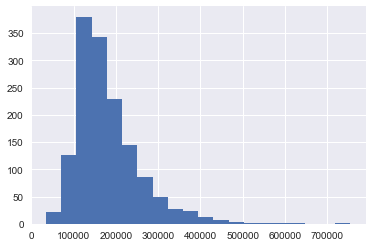

In [12]:
#histogram
#sns.distplot(train_data['SalePrice']);
train_data['SalePrice'].hist(bins=20)

## Check correlation between SalePrice and other columns. Columns have strong relationship with Saleprice will have bigger corr value.

In [21]:
correlation = train_data.corr()['SalePrice'].sort_values()
#print(correlation)

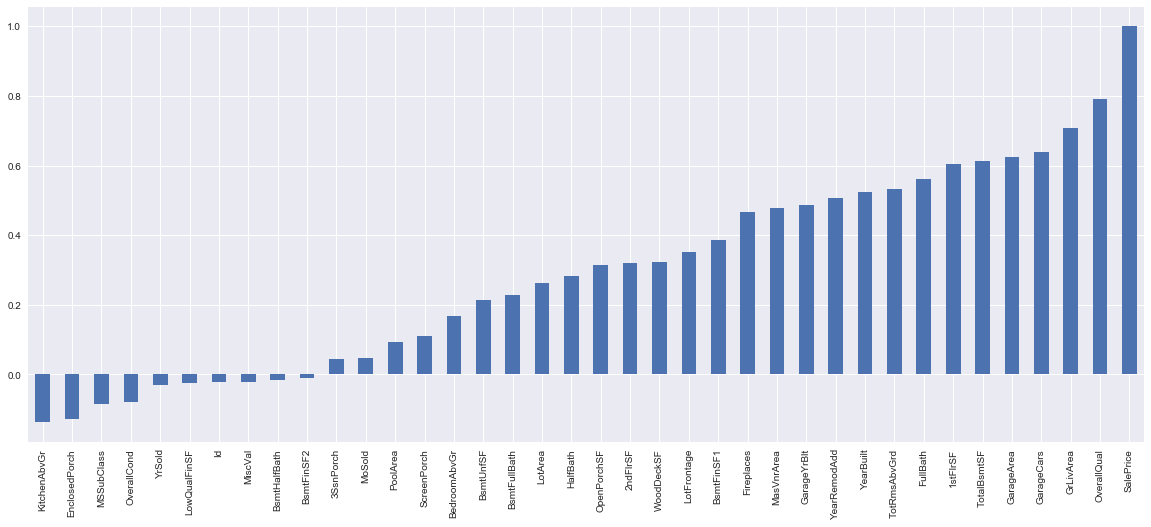

In [18]:
correlation.plot.bar(figsize=(20,8), sort_columns = True)

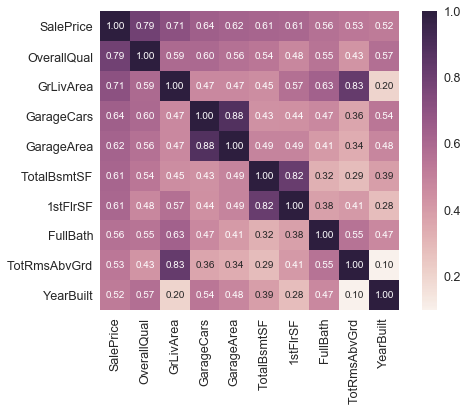

In [20]:
#saleprice correlation matrix
corrmat = train_data.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

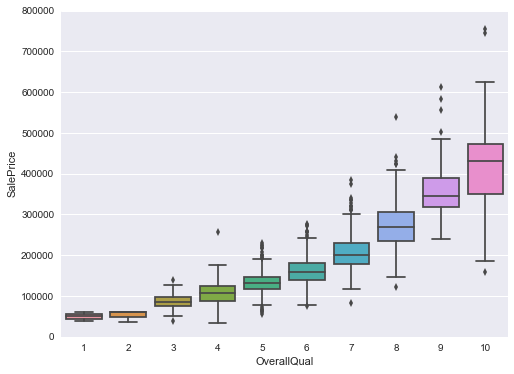

In [15]:
var = 'OverallQual'
qual_data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=qual_data)
fig.axis(ymin=0, ymax=800000);


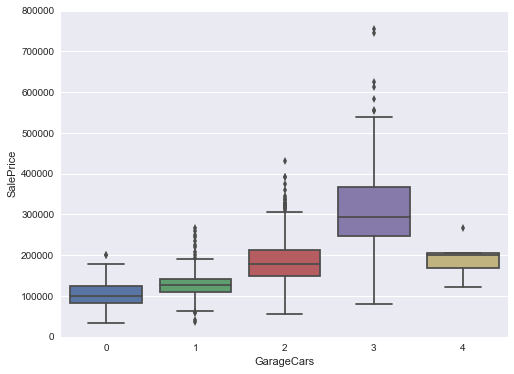

In [17]:
var = 'GarageCars'
qual_data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=qual_data)
fig.axis(ymin=0, ymax=800000);


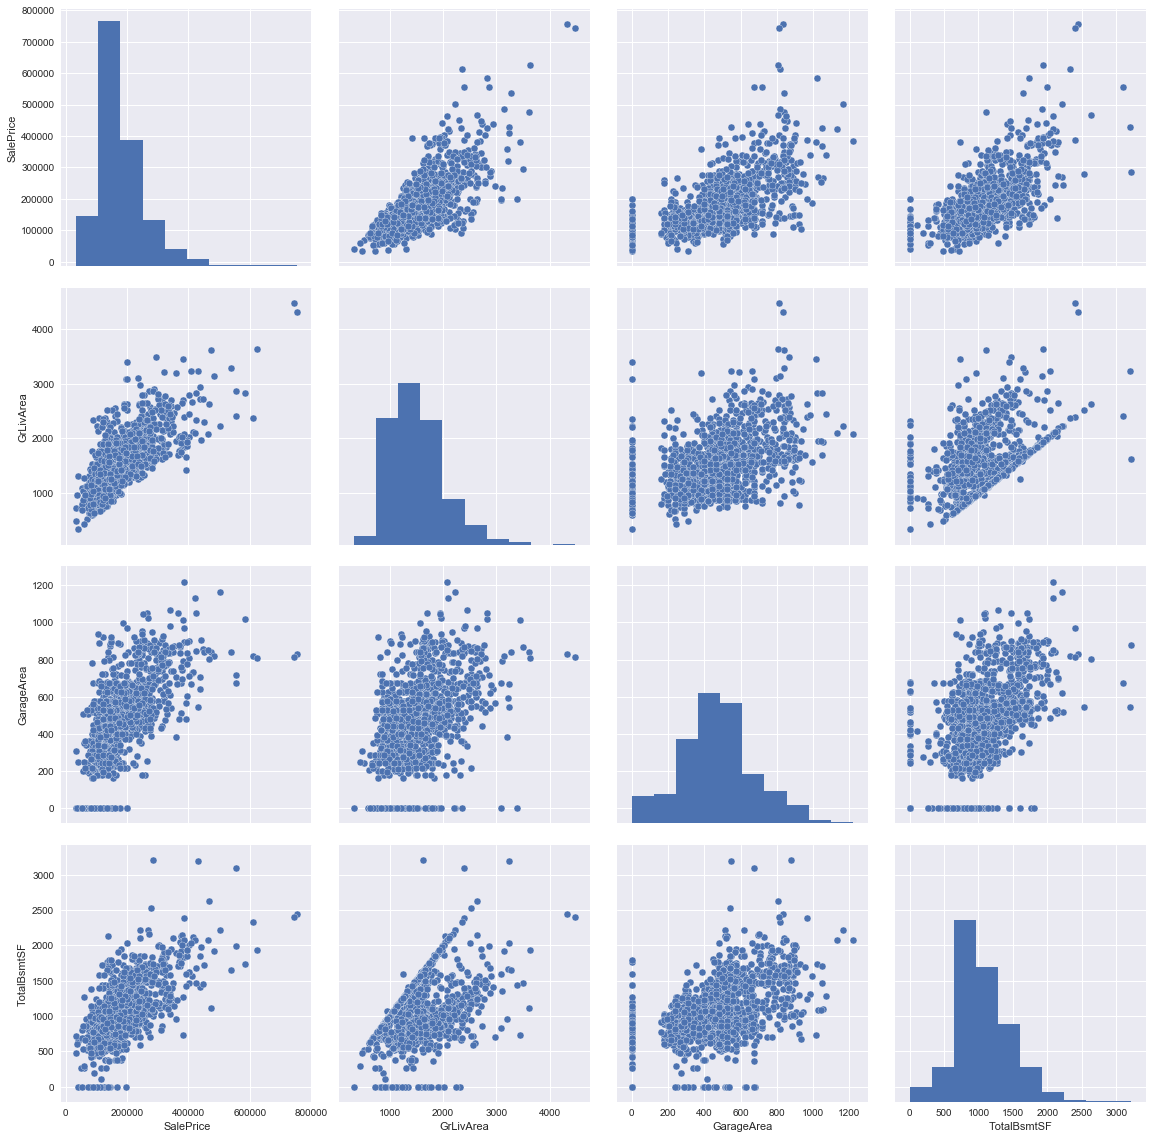

In [41]:
#train_data.plot.scatter(x='GrLivArea', y='SalePrice')
#train_data.plot.scatter(x='GarageArea', y='SalePrice')
#train_data.plot.scatter(x='TotalBsmtSF', y='SalePrice')
#scatterplot
sns.set()
cols = ['SalePrice', 'GrLivArea','GarageArea', 'TotalBsmtSF']
sns.pairplot(train_data[cols], size = 4)
plt.show();

## Clean data. Drop columns with NaN percent >= 15%

In [28]:
#missing data
features = ['SalePrice', 'GrLivArea','GarageArea', 'TotalBsmtSF']
sub_data = train_data[features]
sub_data.head(5)
null_data = sub_data.isnull()
total = null_data.sum().sort_values(ascending=False)
percent = (null_data.sum()/null_data.count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
TotalBsmtSF,0,0.0
GarageArea,0,0.0
GrLivArea,0,0.0
SalePrice,0,0.0


### Clean data. Drop Outliner

#### GrLivArea

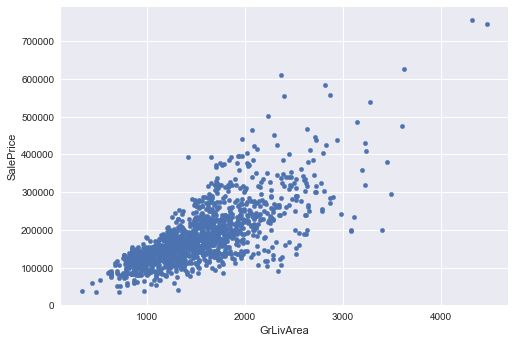

In [35]:
#deleting points
train_data.sort_values(by = 'GrLivArea', ascending = False)[:2]
train_data = train_data.drop(train_data[train_data['Id'] == 1299].index)
train_data = train_data.drop(train_data[train_data['Id'] == 524].index)
train_data.plot.scatter(x='GrLivArea', y='SalePrice')

#### GarageArea

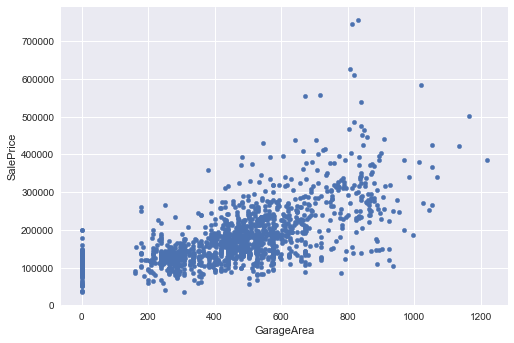

In [40]:
#deleting points
var = 'GarageArea'
train_data.sort_values(by = var, ascending = False)[:3]
train_data = train_data.drop(train_data[train_data['Id'] == 582].index)
train_data = train_data.drop(train_data[train_data['Id'] == 1191].index)
train_data = train_data.drop(train_data[train_data['Id'] == 1062].index)
train_data.plot.scatter(x=var, y='SalePrice')

#### TotalBsmtSF

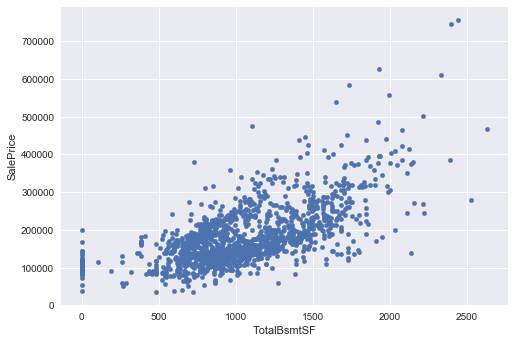

In [43]:
#deleting points
var = 'TotalBsmtSF'
train_data.sort_values(by = var, ascending = False)[:3]
train_data = train_data.drop(train_data[train_data['Id'] == 333].index)
train_data = train_data.drop(train_data[train_data['Id'] == 497].index)
train_data = train_data.drop(train_data[train_data['Id'] == 441].index)
train_data.plot.scatter(x=var, y='SalePrice')